In [1]:
# Homework 2

In [4]:
# 1)
#ARIMA – Autoregressive Integrated Moving Average  

#GAM – Generative Addition Models 

#AR - Autoregression 

In [5]:
# 2)
#Stock price predictions – analysts use financial models based on previous trends to try to predict the movement of 
#stock prices 

#Environmental predictions – forecasting weather events including major precipitation and potential disasters 

In [ ]:
# 3) 
#Time-series: consists of observations of one variable over T periods of time 

#Panel data: consists of observations of multiple variables over T periods of time 

In [ ]:
# 4)
#When choosing training sets in time series models, the chronological order at which the data comes in is important, 
#so typically we want to choose the first “K” amount of time periods within the main time period that the sample 
#comes from. For example, we would choose January, February and March in a sample that comes from a one-year sample period. 
#On the other hand, when selecting training sets in regression/classification tasks, features are assumed to be static 
#and not dependent on time, so you can rondomly shuffle the dataset.  

In [ ]:
# 5)
#Stationary - When a time series has no long-term patterns that are predictable 

#Differencing - If a process is non-stationary (has a predictable trend), we often make it stationary using
#“differencing” to stabilize the variance. This operation calculates the change between consecutive time points 

#White noise - When a series of observations are independently and identically distributed with a mean of 0 and 
#constant variance 

#Random walk - A series of observations where the current observation equals to the previous observation with a 
#random step up and down 

In [20]:
# 6 a)
#c is the equivelance of an intercept
#epsilon is the error term
#phi is the Autoregression coefficient
#theta is the moving average coefficient 
#epsilon(t-1) is the lag of the MA

In [ ]:
# b) based on the epsilon t and epsilon t-1, it appears that this model has been differenced


In [24]:
# c) the AR order is AR(3),AR(2),AR(1) and the MA order is MA(4),MA(3),MA(2),MA(1) in this equation. This is evident
#because 3 represents 'p' while 4 represents 'q' in a normal ARMA model and we can see these numbers above the sigmas 

In [25]:
# d) The AR and MA order stem from plotting the ACF and PACF models, in which we take the number of bars that are
# until a bar becomes statistically sunignificant where it does not exceed the thresshold lines. 

In [12]:
# programming

In [8]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import statsmodels.api as sm # v 0.13.5

import matplotlib.pyplot as plt # 3.6.3

import warnings as ww
import statsmodels.tsa.stattools as stattools  # v 0.13.5

from statsmodels.tsa.stattools import adfuller # v 0.13.5
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.13.5
from statsmodels.tsa.arima_model import ARIMA # v 0.13.5

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [9]:
df = pd.read_csv ('/Users/liamcarney9/Downloads/Electric_Production.csv')

In [10]:
# 1) - EDA

df.columns, df.shape, df.dtypes

#"DATE" = object -> will cause problems if left this way

(Index(['DATE', 'IPG2211A2N'], dtype='object'),
 (397, 2),
 DATE           object
 IPG2211A2N    float64
 dtype: object)

In [13]:
df.isna().sum() 

DATE          0
IPG2211A2N    0
dtype: int64

In [15]:
df.head(), df.tail()

(       DATE  IPG2211A2N
 0  1/1/1985     72.5052
 1  2/1/1985     70.6720
 2  3/1/1985     62.4502
 3  4/1/1985     57.4714
 4  5/1/1985     55.3151,
           DATE  IPG2211A2N
 392   9/1/2017     98.6154
 393  10/1/2017     93.6137
 394  11/1/2017     97.3359
 395  12/1/2017    114.7212
 396   1/1/2018    129.4048)

In [16]:
df.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [17]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

DATE          datetime64[ns]
IPG2211A2N           float64
dtype: object

In [ ]:
# after completing some EDA and changing the data type of the "DATE" variable, there doe snot appear to be anything
# that stands out or is abnormal in this dataset

In [18]:
# 2) - KPSS and ADF tests
def adfuller_test(timeseries):
    result=adfuller(timeseries)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [19]:
for i in df.columns:
    print(i), adfuller_test(df[i])
    print()

DATE
ADF Test Statistic : -0.14017905755842586
p-value : 0.9452865588327344
#Lags Used : 12
Number of Observations : 384
weak evidence against null hypothesis,indicating it is non-stationary 

IPG2211A2N
ADF Test Statistic : -2.2569903500472455
p-value : 0.18621469116586759
#Lags Used : 15
Number of Observations : 381
weak evidence against null hypothesis,indicating it is non-stationary 



In [ ]:
# based on the above results of the ADF test, it appears that the data is not stationary, as there is weak evidence
#against the null. This is supported by the p-value of .18, as it is not below the level of significance of .05

In [22]:
for i in df.columns:
    print (i)
    print()
    print (stattools.kpss(df[i], regression='ct'))
    print ()

DATE

(0.01715323608367948, 0.1, 7, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

IPG2211A2N

(0.5051030832418602, 0.01, 16, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})



/Users/liamcarney9/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/liamcarney9/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [26]:
# The KPSS results tell us that the p value is .01 and the test statistic is .5. This indicates again that the data
# is not stationary, and we need to difference it. 

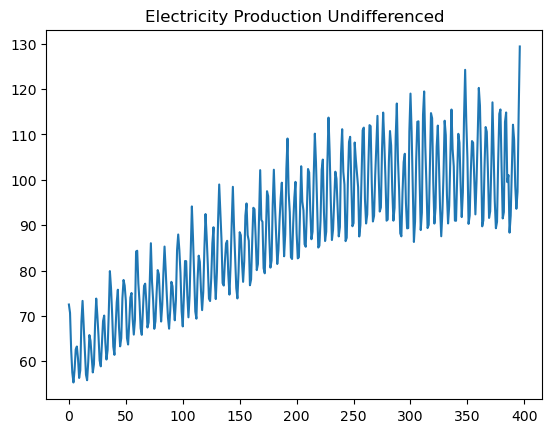

In [29]:
df["IPG2211A2N"].plot(fig=plt.figure(i))
plt.title("Electricity Production Undifferenced")
plt.show() 

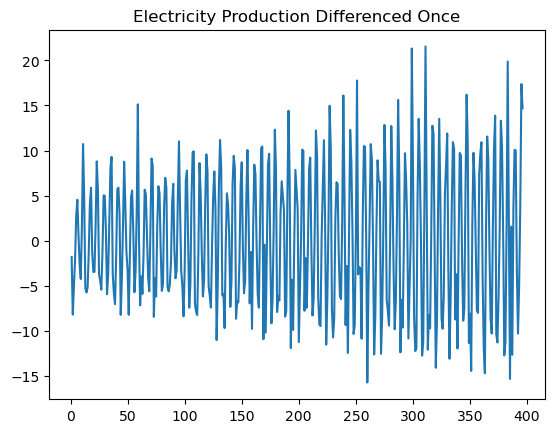

In [30]:
df["IPG2211A2N"].diff().plot(fig=plt.figure(i))
plt.title("Electricity Production Differenced Once")
plt.show() 

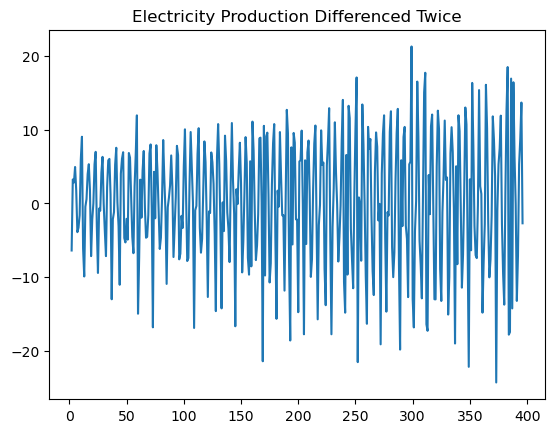

In [31]:
df["IPG2211A2N"].diff().diff().plot(fig=plt.figure(i))
plt.title("Electricity Production Differenced Twice")
plt.show() 

In [32]:
# The original plot undifferenced looks skewed along with some variance in the data, as expected. When we difference
# the data once, the data appears to become more normalluy distributed with smaller variance. When differenced
# twice, it appears to be pretty similar to the single differenced graph. 

/Users/liamcarney9/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

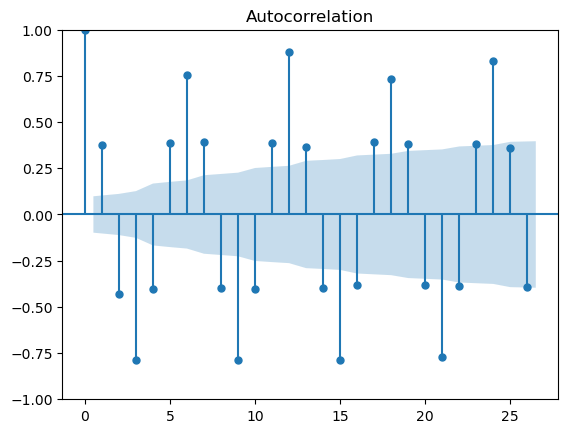

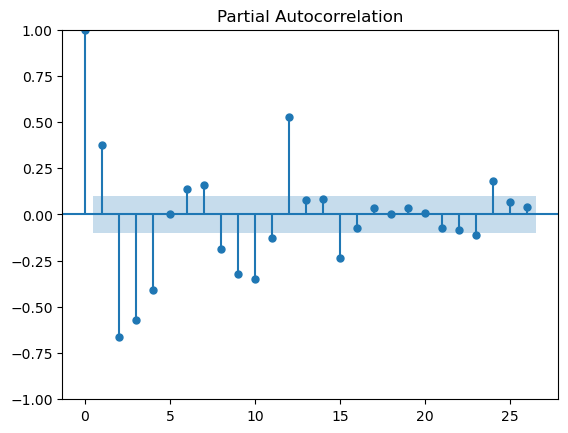

In [33]:
def acf_pacf (series)-> plt.plot:
    return plot_acf(series), plot_pacf(series)

acf_pacf(df['IPG2211A2N'].diff().tail(len(df)-1))

In [39]:
# based on the above graphs, it appears the AR order would be 25, while the MA order would be 5. That said the 
# ARIMA order would be 5,1,25 as the second difference did not appear to affect the graph significantly. 

In [40]:
df['IPG2211A2N'] = df['IPG2211A2N'].diff()

In [44]:
model = sm.tsa.arima.ARIMA(df['IPG2211A2N'].head(int(0.8*len(df))), order=(25, 1, 5))
results = model.fit()

results.summary()

/Users/liamcarney9/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/liamcarney9/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/liamcarney9/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  317
Model:                ARIMA(25, 1, 5)   Log Likelihood                -726.742
Date:                Tue, 03 Oct 2023   AIC                           1515.483
Time:                        09:51:16   BIC                           1631.911
Sample:                             0   HQIC                          1561.995
                                - 317                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9912     31.271     -0.032      0.975     -62.281      60.298
ar.L2         -0.5180     17.592     -0.029      0.977     -34.997      33.961
ar.L3         -0.4465     14.546     -0.031      0.976     -28.956      28.063
ar.L4         -0.5082     12.779     -0.040      0.968     -25.554      24.538
ar.L5         -0.5935     14.499     -0.041      0.967     -29.011      27.824
ar.L6         -0.5565     15.884     -0.035      0.972     -31.689      30.576
ar.L7         -0.5433     14.383     -0.038      0.970     -28.734      27.648
ar.L8         -0.6307     14.921     -0.042      0.966     -29.875      28.613
ar.L9         -0.5891     17.070     -0.035      0.972     -34.045      32.867
ar.L10        -0.5862     15.029     -0.039      0.969     -30.042      28.870
ar.L11        -0.5471     16.210     -0.034      0.973     -32.318      31.224
ar.L12        -0.0805     14.272     -0.006      0.996     -28.053      27.892
ar.L13        -0.0969      4.625     -0.021      0.983      -9.162       8.968
ar.L14        -0.3922      6.649     -0.059      0.953     -13.424      12.640
ar.L15        -0.4915     10.603     -0.046      0.963     -21.273      20.290
ar.L16        -0.4500     12.322     -0.037      0.971     -24.601      23.701
ar.L17        -0.3200     11.178     -0.029      0.977     -22.229      21.589
ar.L18        -0.3441      8.324     -0.041      0.967     -16.659      15.971
ar.L19        -0.3404     10.120     -0.034      0.973     -20.175      19.494
ar.L20        -0.2604      8.668     -0.030      0.976     -17.249      16.728
ar.L21        -0.3041      7.130     -0.043      0.966     -14.279      13.671
ar.L22        -0.3521      8.789     -0.040      0.968     -17.579      16.875
ar.L23        -0.2714      9.136     -0.030      0.976     -18.177      17.634
ar.L24         0.0958      6.879      0.014      0.989     -13.387      13.579
ar.L25         0.1131      4.552      0.025      0.980      -8.808       9.034
ma.L1         -0.3957     31.276     -0.013      0.990     -61.695      60.903
ma.L2         -0.8263     27.864     -0.030      0.976     -55.439      53.787
ma.L3          0.1458      8.989      0.016      0.987     -17.473      17.764
ma.L4          0.1649      6.526      0.025      0.980     -12.625      12.955
ma.L5         -0.0063      0.531     -0.012      0.990      -1.047       1.034
sigma2         5.3524      0.419     12.784      0.000       4.532       6.173
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                13.15
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               2.31   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using t

In [45]:
df['IPG2211A2N_forecast']=results.predict(start = int(0.8*len(df))+1, end=len(df) , dynamic=True)

/Users/liamcarney9/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

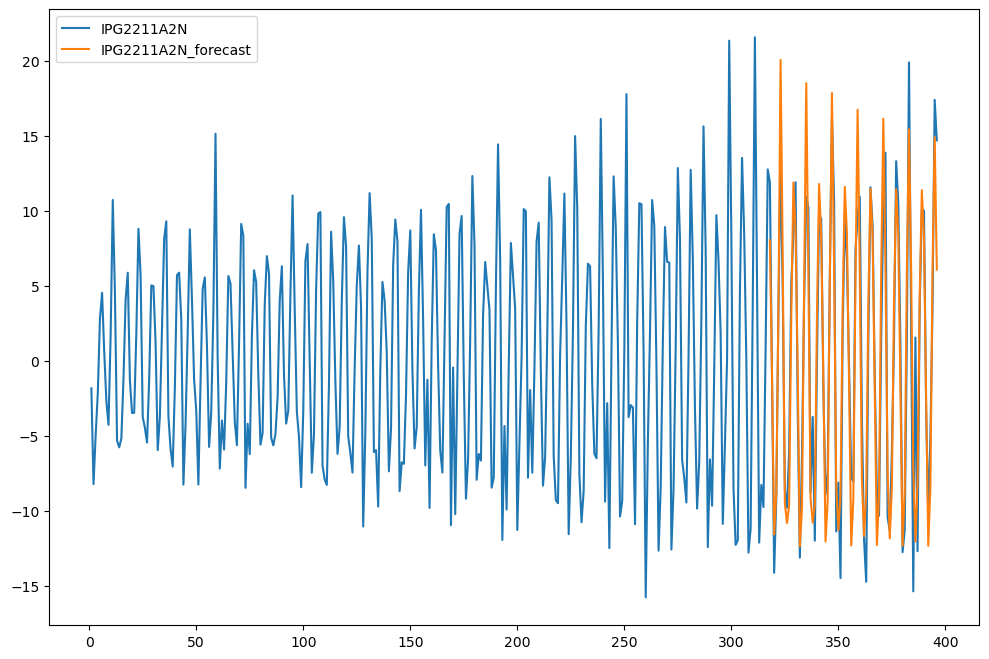

In [47]:
df[['IPG2211A2N','IPG2211A2N_forecast']].plot(figsize=(12,8))

In [48]:
mean_absolute_error(df['IPG2211A2N_forecast'].tail(int(0.2*len(df))),df['IPG2211A2N'].tail(int(0.2*len(df))))

2.969857428316856

In [49]:
mean_squared_error(df['IPG2211A2N_forecast'].tail(int(0.2*len(df))),df['IPG2211A2N'].tail(int(0.2*len(df))))

14.520353995497354

In [50]:
# the mean absolute error appears to be pretty low witha value of 2.97. This along with the model and plot visuals 
# seem to be enough reason to believe that this is a good fit, especially when differenced once. 